In [1]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:

fluid = 'Hydrogen'

n=10
Tmin = 20
T0= 25
Tmax = 220
P1 = 2e6
P2 = 4e6

T=np.linspace(Tmin, Tmax, n)
def create_table(P):
    #scaling variables
    beta0 = PropsSI('ISOBARIC_EXPANSION_COEFFICIENT', 'T', T0, 'P', P, fluid)
    enth0 = PropsSI('H', 'T', T0, 'P', P, fluid)
    cp0 = PropsSI('C', 'T', T0, 'P', P, fluid)
    lam0 = PropsSI('L', 'T', T0, 'P', P, fluid)
    rho0 = PropsSI('D', 'T', T0, 'P', P, fluid)
    mu0= PropsSI('L', 'T', T0, 'P', P, fluid)
    df1 = pd.DataFrame(T, columns=['temp'])
    df1['P']=P
    df1['rho']=df1.apply(lambda x:PropsSI('D', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    df1['mu']=df1.apply(lambda x:PropsSI('V', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    df1['lam']=df1.apply(lambda x:PropsSI('L', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    df1['cp']=df1.apply(lambda x:PropsSI('C', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    df1['enth']=df1.apply(lambda x:PropsSI('H', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    df1['beta']=df1.apply(lambda x:PropsSI('ISOBARIC_EXPANSION_COEFFICIENT', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
    #scale
    df1['temp']=df1['temp']/T0
    df1['rho']=df1['rho']/rho0
    df1['mu']=df1['mu']/mu0
    df1['lam']=df1['lam']/lam0
    df1['cp']=df1['cp']/cp0
    df1['enth']=df1['enth']-enth0
    df1['beta']=df1['beta']/beta0
    return df1

In [11]:

df1 = create_table(P1)
df1[['temp', 'rho', 'mu', 'lam', 'cp', 'enth', 'beta']].to_csv("low_pressure.csv",
                                                               float_format="%1.10e", 
                                                               sep='\t' , 
                                                               index=None,
                                                               header=None)
df2= create_table(P2)
df2[['temp', 'rho', 'mu', 'lam', 'cp', 'enth', 'beta']].to_csv("high_pressure.csv",
                                                               float_format="%1.10e", 
                                                               sep='\t' , 
                                                               index=None,
                                                               header=None)



In [12]:
df2 = pd.DataFrame(T, columns=['temp'])
df2['P']=P2
df2['rho']=df1.apply(lambda x:PropsSI('D', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
df2['mu']=df1.apply(lambda x:PropsSI('V', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
df2['lam']=df1.apply(lambda x:PropsSI('L', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
df2['cp']=df1.apply(lambda x:PropsSI('C', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
df2['enth']=df1.apply(lambda x:PropsSI('H', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
df2['beta']=df1.apply(lambda x:PropsSI('ISOBARIC_EXPANSION_COEFFICIENT', 'T', x['temp'], 'P', x['P'], fluid), axis=1)
#scale
df1['temp']=df1['temp']/T0
df1['rho']=df1['rho']/rho0
df1['mu']=df1['mu']/mu0
df1['lam']=df1['lam']/lam0
df1['cp']=df1['cp']/cp0
df1['enth']=df1['enth']-enth0
df1['beta']=df1['beta']/beta0
df1[['temp', 'rho', 'mu', 'lam', 'cp', 'enth', 'beta']].to_csv("low_pressure.csv",float_format="%1.10e", sep='\t' , index=None)



ValueError: ('The molar density of -108233364.056567 mol/m3 is below the minimum of 0.000000 mol/m3 : PropsSI("D","T",0.8,"P",2000000,"Hydrogen")', 'occurred at index 0')

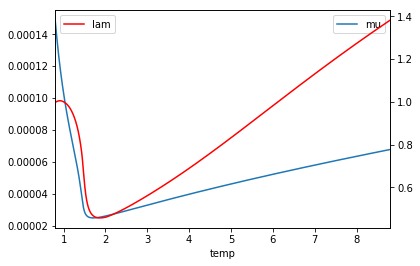

In [81]:
fig, ax = plt.subplots()
df1.plot('temp','mu',ax=ax)
ax1 = ax.twinx()
df1.plot('temp','lam',ax=ax1, color='r')


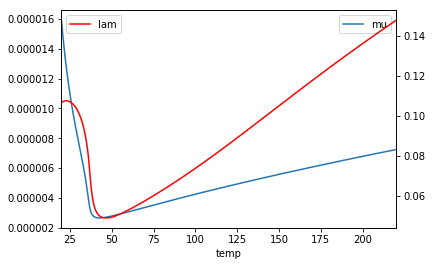

In [52]:
fig, ax = plt.subplots()

